## Preprocessing et Modéle de Regression 

* jeu de donnée : [Cliquer ici](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

#### Importation des packages 

In [369]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

#### Importation du jeu de données 

In [328]:
actual_path =  os.getcwd()

target_path = "/Users/ibrahima/Documents/MyGitRepository/Machine-Learning-Course/dataset_house_price"
os.chdir(target_path)

df = pd.read_csv("train.csv").drop(columns=["Id"])
df.head(3)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Preprocessing(Pré-traitemnet)

## Le but:

> mettre les données sous un format propice pour develloper un modéle de machinde learning

#### Mettre les données dans un format propice au ML :

- Séparer le jeux de données en ( Trainset / Testset)
- Encodage des variables
- Nettoyage des NaN
------------------------------------
#### Améliorer la performance du modéle :

- Faire du Feature Selection
- Faire du Feature Engeinnering
- Feature Scaling
- Delete the Outliers


#### Separation du jeu de données 

In [303]:
target_name = 'SalePrice'
Dtrain , Dtest  = train_test_split(df,  train_size=0.75, random_state=12)


#### Traitement des valeurs manquantes


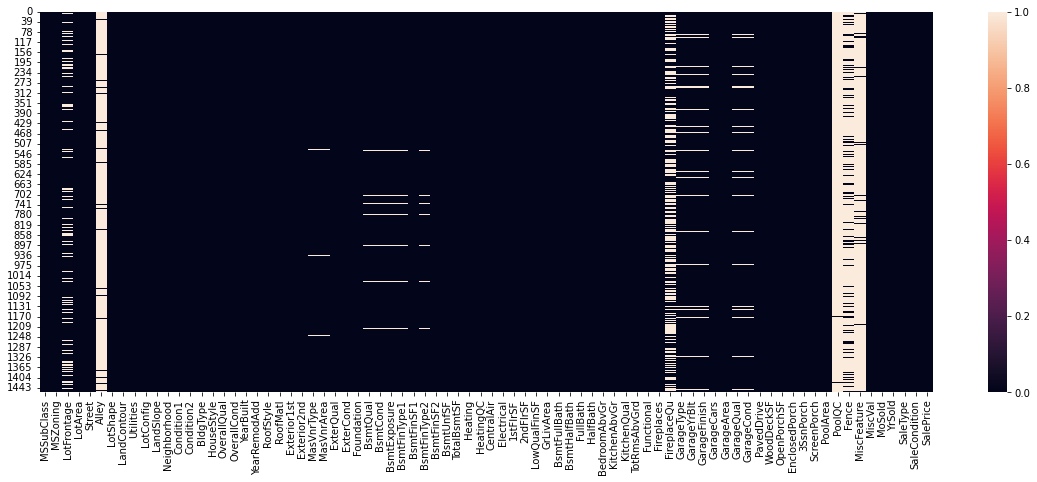

In [304]:
def plot_missing_values(df):
    """trace une carte des valeurs manquantes

    Args:
        df (data frame ): un tableau en entrée 
    """
    plt.figure(figsize=(20, 7)) 
    sns.heatmap(df.isnull())

plot_missing_values(df)

In [305]:
missing_rate : (Dtrain.isnull().sum() / len(Dtrain)).sort_values(ascending=False)
remove_columns = missing_rate[missing_rate>0.40].index.to_list()


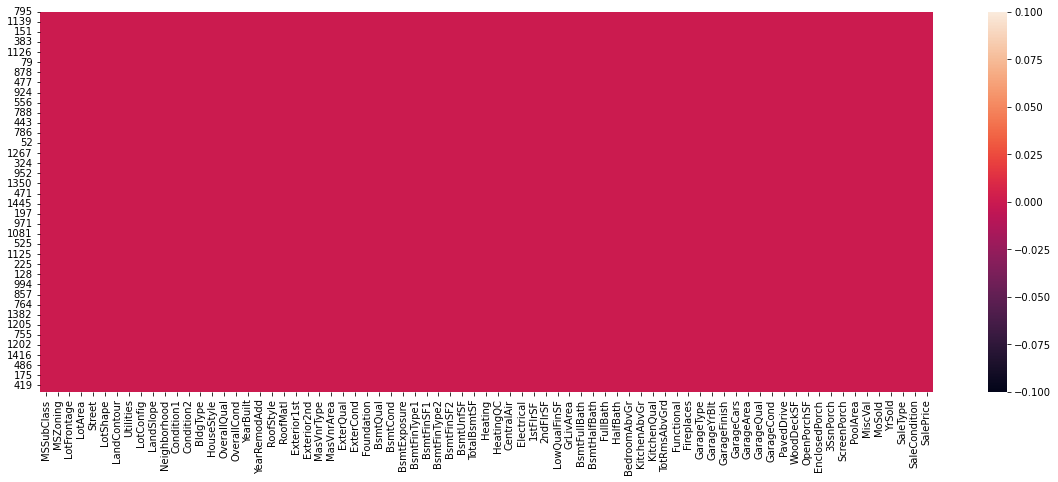

In [307]:


def missing_value(df): 
    """traite les valeurs manquantes 

    Args:
        df (data frame ): tableau de donnée 

    Returns:
        data frame : tableau de donnée 
    """
    df = df.drop(columns=remove_columns, axis=1)
    df.dropna(inplace=True)
    
    return df 



plot_missing_values(missing_value(Dtrain))



#### Encodage des valeurs mmanquantes 

In [308]:
def seperate(df): 
    """separe le data frame selon le type 

    Args:
        df (Data Frame): cest un data frame 

    Return: 
        Retourne deux data frame 
    """

    categorical_columns = df.select_dtypes(include=["object"]).columns.to_list()


    numerical_columns = df.select_dtypes(exclude=["object"]).columns.to_list()
    

    return df[numerical_columns], df[categorical_columns]







In [309]:
def encoding(df): 
    encoder = LabelEncoder()
    dico = {}
    for col in df.columns: 
        value = encoder.fit_transform(df.loc[: ,col])
        dico[col] = value
    return pd.DataFrame(dico)




In [339]:
def preprocessing(df): 
    """Traitement du dataset 

    Args:
        df (Data Frame ): le data frame en entré 

    Returns:
        (Xtrain, Ytrain)(Data Frame, Data Frame ): il retourne deux data frame (features, target)
    """

    # traitement des valeurs manquantes 
    df  = missing_value(df)

    #separation selon le type
    df_num, df_cat = seperate(df)
    
    df_cat_encode  = encoding(df_cat)
    print(df_cat_encode.isnull().sum().sum())

    
    # regroupement des dataframe 
    col_df_num = df_num.columns.to_list()
    col_df_cat_encode = df_cat_encode.columns.to_list()

    all_col = col_df_num + col_df_cat_encode

    df_array = np.concatenate([df_num.values, df_cat_encode.values], axis = 1 )
    
    df = pd.DataFrame(df_array, columns= all_col)


    #separtion du dataframe 

    Xtrain, Ytrain = df.drop(columns=[target_name], axis=1), df.loc[:, target_name]
    return Xtrain, Ytrain

In [346]:
Xtrain, Ytrain = preprocessing(Dtrain)

0


#### Modélisation 

In [364]:
model =  LinearRegression()
model.fit(Xtrain, Ytrain)


# mean squra 
pred = model.predict(Xtrain)
mean_squared_error(Ytrain, pred )



640717943.1947516

In [ ]:
def mean_squared_error(X, y ): 
    y = y.values 
    prediction = model.predict(X)
    mse = ((prediction -  y)**2).mean()
    return mse 


#### Erreur de generalisation 

In [371]:
Xtest , Ytest = preprocessing(Dtest)
pred_test = model.predict(Xtest)

mean_squared_error(Ytest, pred_test)

0


7352715905.113242